In [52]:
import kagglehub
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(path+'/Housing.csv')

Path to dataset files: /Users/dikshyagiri/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [53]:
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
print("Path to dataset files:", path)

df = pd.read_csv(path + '/Housing.csv')
# print("Data loaded successfully!")
# df=df[['price','area','bedrooms','bathrooms','stories','parking']]
df.head()

Path to dataset files: /Users/dikshyagiri/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:


# Cell 3: Explore Data


print("\nSummary Statistics:")
print(df.describe())

print("\nMode of each column:")
print(df.mode().iloc[0])





Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  

Mode of each column:
price                      3500000
area                        6000.0
bedrooms                       3.0
bathrooms     

In [55]:
#finding the mode
df.mode()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
def clean_data(df):
    """Convert non-numeric columns to numeric using mapping dictionaries."""
    df_clean = df.copy()
    for col in df_clean.columns:
        if df_clean[col].dtype == 'object':
            unique_vals = df_clean[col].unique()
            mapping = {val: idx for idx, val in enumerate(unique_vals)}
            df_clean[col] = df_clean[col].map(mapping)
            print(f"Converted {col} using mapping: {mapping}")
    return df_clean

df_clean = clean_data(df)
df_clean.head()


Converted mainroad using mapping: {'yes': 0, 'no': 1}
Converted guestroom using mapping: {'no': 0, 'yes': 1}
Converted basement using mapping: {'no': 0, 'yes': 1}
Converted hotwaterheating using mapping: {'no': 0, 'yes': 1}
Converted airconditioning using mapping: {'yes': 0, 'no': 1}
Converted prefarea using mapping: {'yes': 0, 'no': 1}
Converted furnishingstatus using mapping: {'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,0,0,2,0,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,1,0
2,12250000,9960,3,2,2,0,0,1,0,1,2,0,1
3,12215000,7500,4,2,2,0,0,1,0,0,3,0,0
4,11410000,7420,4,1,2,0,1,1,0,0,2,1,0


In [57]:
def run_one(df, IVs, DV):
    """Train Linear Regression and evaluate performance."""
    X = df[IVs]
    y = df[DV]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # plot_output(X_train, y_train, y_pred_train, X_test, y_test, y_pred_test, IVs, DV)

    return [IVs, train_rmse, train_r2, test_rmse, test_r2, len(IVs)]


In [58]:
def run_TWO(df, IVs, DV):
    """Train Linear Regression and evaluate performance."""
    X = df[IVs]
    y = df[DV]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    plot_output(X_train, y_train, y_pred_train, X_test, y_test, y_pred_test, IVs, DV)

    return [IVs, train_rmse, train_r2, test_rmse, test_r2, len(IVs)]


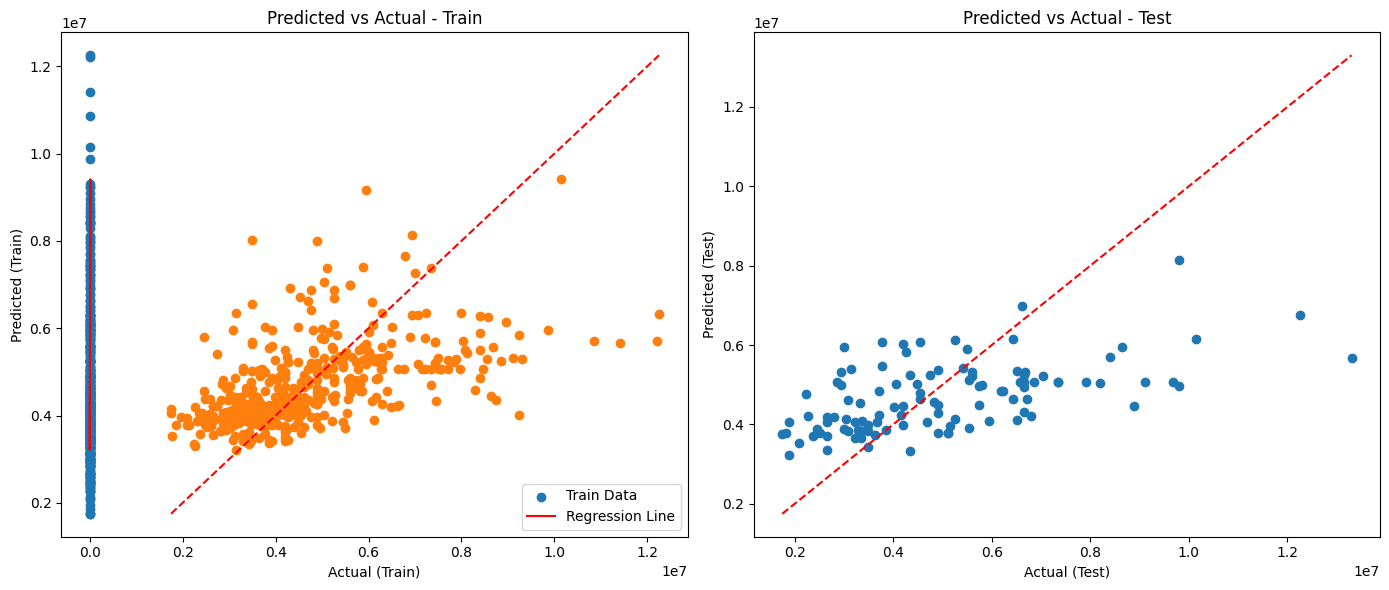


Model Results:
Features: ['area']
Train RMSE: 1484836.25, Train R²: 0.28
Test RMSE: 1917103.70, Test R²: 0.27
#Features: 1


In [59]:
def plot_output(X_train, y_train, y_pred_train, X_test, y_test, y_pred_test, IVs, DV):
    """Visualize training/test predictions and regression line if single feature."""
    plt.figure(figsize=(14, 6))

    if len(IVs) == 1:
        feature = IVs[0]
        plt.subplot(1, 2, 1)
        plt.scatter(X_train[feature], y_train, label='Train Data')
        plt.plot(X_train[feature], y_pred_train, color='red', label='Regression Line')
        plt.xlabel(feature)
        plt.ylabel(DV)
        plt.title("Regression Line (Train Set)")
        plt.legend()

    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_pred_train)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    plt.xlabel("Actual (Train)")
    plt.ylabel("Predicted (Train)")
    plt.title("Predicted vs Actual - Train")

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual (Test)")
    plt.ylabel("Predicted (Test)")
    plt.title("Predicted vs Actual - Test")

    plt.tight_layout()
    plt.show()

IVs = [col for col in df_clean.columns if col != 'price'] 
DV = 'price'  
results = run_TWO(df_clean,['area'], DV)
print("\nModel Results:")
print(f"Features: {results[0]}")
print(f"Train RMSE: {results[1]:.2f}, Train R²: {results[2]:.2f}")
print(f"Test RMSE: {results[3]:.2f}, Test R²: {results[4]:.2f}")
print(f"#Features: {results[5]}")



#LAB PART II


In [60]:
from itertools import combinations

def create_combinations(features):
    """Return a list of all possible non-empty feature combinations."""
    all_combos = []
    for i in range(1, len(features) + 1):
        all_combos.extend([list(combo) for combo in combinations(features, i)])
    print(f"Total combinations created: {len(all_combos)}")
    return all_combos

features = [col for col in df_clean.columns if col != 'price']
all_combos = create_combinations(features)
print("First 5 combinations:", all_combos[:5])



Total combinations created: 4095
First 5 combinations: [['area'], ['bedrooms'], ['bathrooms'], ['stories'], ['mainroad']]


In [61]:
results_list = []

for combo in all_combos:
    res = run_one(df_clean, combo, 'price')
    results_list.append(res)

results_df = pd.DataFrame(results_list, columns=[
    'Features', 'Train_RMSE', 'Train_R2', 'Test_RMSE', 'Test_R2', 'Num_Features'
])

best_rmse = results_df.sort_values(by='Test_RMSE', ascending=True).head(10)
best_r2 = results_df.sort_values(by='Test_R2', ascending=False).head(10)

print("Top 10 Models by Lowest Test RMSE:")
display(best_rmse)

print("Top 10 Models by Highest Test R²:")
display(best_r2)


Top 10 Models by Lowest Test RMSE:


,Features,Train_RMSE,Train_R2,Test_RMSE,Test_R2,Num_Features
4094,"[area, bedrooms, bathrooms, stories, mainroad,...",9.848364e+05,0.685443,1.331071e+06,0.649475,12
4087,"[area, bedrooms, bathrooms, stories, mainroad,...",9.977962e+05,0.677110,1.333445e+06,0.648224,11
4092,"[area, bathrooms, stories, mainroad, guestroom...",9.861024e+05,0.684634,1.336738e+06,0.646485,11
4088,"[area, bedrooms, bathrooms, stories, mainroad,...",9.880362e+05,0.683396,1.340139e+06,0.644683,11
4026,"[area, bedrooms, bathrooms, stories, mainroad,...",1.012100e+06,0.667786,1.340289e+06,0.644604,10
4082,"[area, bedrooms, bathrooms, stories, mainroad,...",9.962334e+05,0.678120,1.341937e+06,0.643730,11
4066,"[area, bathrooms, stories, mainroad, guestroom...",1.000426e+06,0.675405,1.341962e+06,0.643716,10
4089,"[area, bedrooms, bathrooms, stories, guestroom...",9.918445e+05,0.680950,1.344417e+06,0.642412,11
4067,"[area, bathrooms, stories, mainroad, basement,...",9.891866e+05,0.682658,1.345447e+06,0.641863,10
4042,"[area, bedrooms, bathrooms, stories, guestroom...",1.005241e+06,0.672274,1.346973e+06,0.641051,10


Top 10 Models by Highest Test R²:


,Features,Train_RMSE,Train_R2,Test_RMSE,Test_R2,Num_Features
4094,"[area, bedrooms, bathrooms, stories, mainroad,...",9.848364e+05,0.685443,1.331071e+06,0.649475,12
4087,"[area, bedrooms, bathrooms, stories, mainroad,...",9.977962e+05,0.677110,1.333445e+06,0.648224,11
4092,"[area, bathrooms, stories, mainroad, guestroom...",9.861024e+05,0.684634,1.336738e+06,0.646485,11
4088,"[area, bedrooms, bathrooms, stories, mainroad,...",9.880362e+05,0.683396,1.340139e+06,0.644683,11
4026,"[area, bedrooms, bathrooms, stories, mainroad,...",1.012100e+06,0.667786,1.340289e+06,0.644604,10
4082,"[area, bedrooms, bathrooms, stories, mainroad,...",9.962334e+05,0.678120,1.341937e+06,0.643730,11
4066,"[area, bathrooms, stories, mainroad, guestroom...",1.000426e+06,0.675405,1.341962e+06,0.643716,10
4089,"[area, bedrooms, bathrooms, stories, guestroom...",9.918445e+05,0.680950,1.344417e+06,0.642412,11
4067,"[area, bathrooms, stories, mainroad, basement,...",9.891866e+05,0.682658,1.345447e+06,0.641863,10
4042,"[area, bedrooms, bathrooms, stories, guestroom...",1.005241e+06,0.672274,1.346973e+06,0.641051,10


/var/folders/sr/m84qlt3x6ylbwjgl5x6v7t700000gn/T/ipykernel_30664/3775497155.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


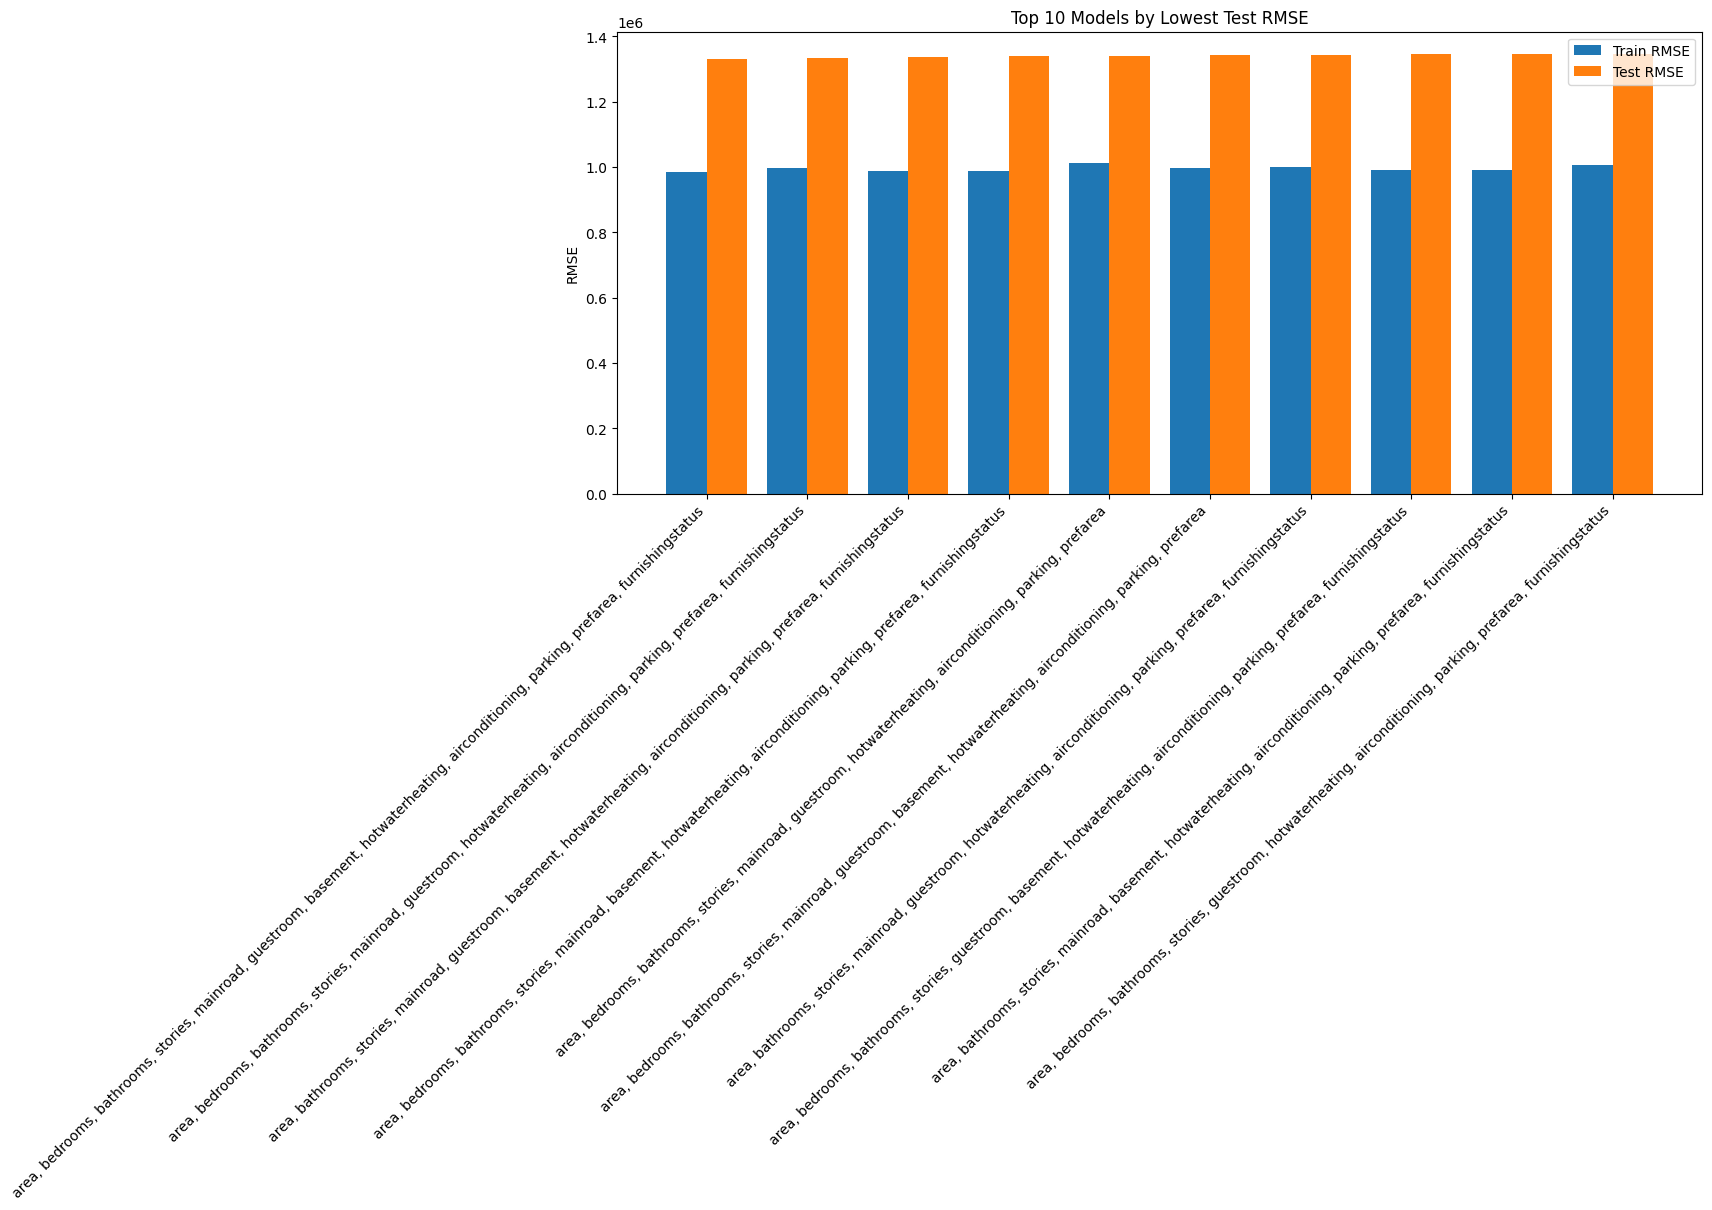

/var/folders/sr/m84qlt3x6ylbwjgl5x6v7t700000gn/T/ipykernel_30664/3775497155.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


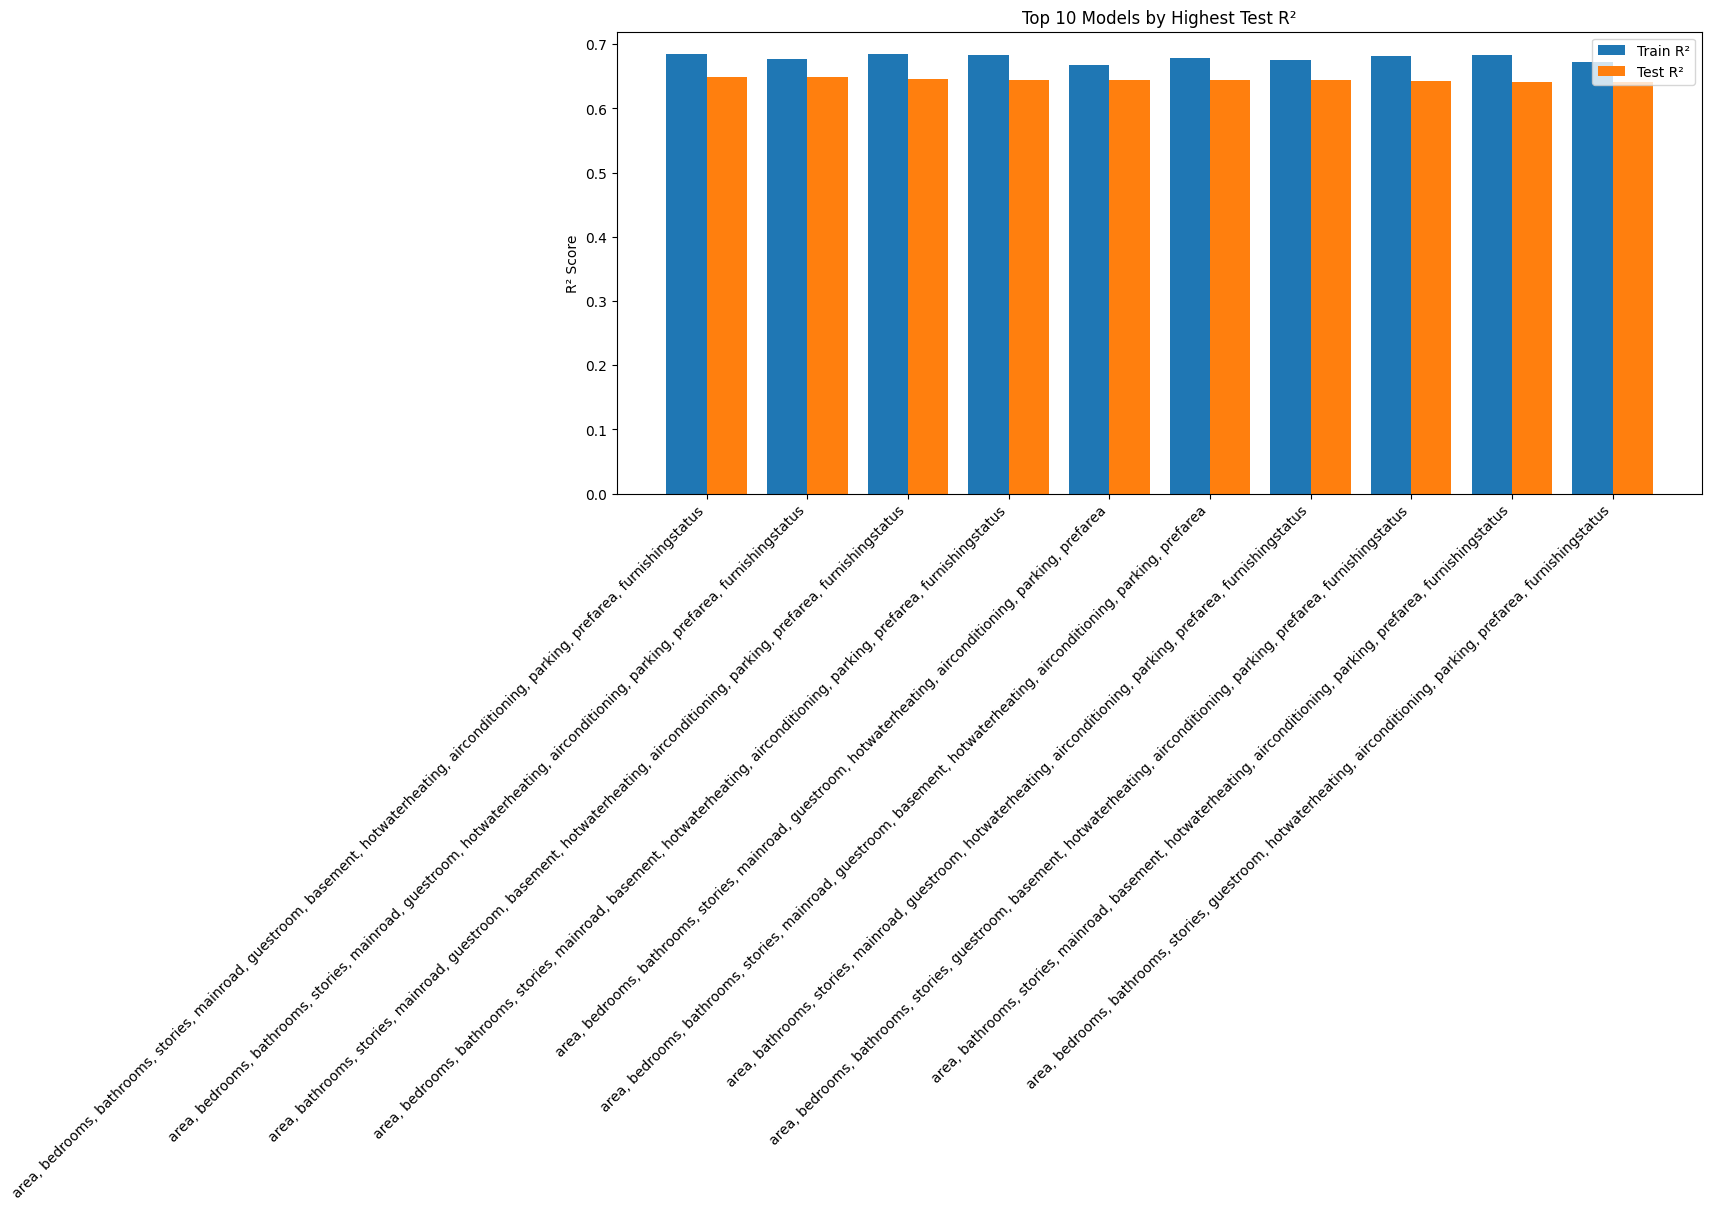

Best Model (Minimum RMSE):
Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Test RMSE: 1331071.417, Test R²: 0.649

Best Model (Maximum R²):
Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Test RMSE: 1331071.417, Test R²: 0.649

Best Overall Model (Balanced by Feature Count):


,Features,Train_RMSE,Train_R2,Test_RMSE,Test_R2,Num_Features,Score
88,"[area, bathrooms, stories]",1.197860e+06,0.534646,1.576788e+06,0.508117,3,0.358117


In [62]:

plt.figure(figsize=(14, 6))
x_labels_rmse = [', '.join(f) for f in best_rmse['Features']]
plt.bar(np.arange(10)-0.2, best_rmse['Train_RMSE'], width=0.4, label='Train RMSE')
plt.bar(np.arange(10)+0.2, best_rmse['Test_RMSE'], width=0.4, label='Test RMSE')
plt.xticks(np.arange(10), x_labels_rmse, rotation=45, ha='right')
plt.title("Top 10 Models by Lowest Test RMSE")
plt.ylabel("RMSE")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
x_labels_r2 = [', '.join(f) for f in best_r2['Features']]
plt.bar(np.arange(10)-0.2, best_r2['Train_R2'], width=0.4, label='Train R²')
plt.bar(np.arange(10)+0.2, best_r2['Test_R2'], width=0.4, label='Test R²')
plt.xticks(np.arange(10), x_labels_r2, rotation=45, ha='right')
plt.title("Top 10 Models by Highest Test R²")
plt.ylabel("R² Score")
plt.legend()
plt.tight_layout()
plt.show()

best_rmse_model = best_rmse.iloc[0]
best_r2_model = best_r2.iloc[0]

print("Best Model (Minimum RMSE):")
print(f"Features: {best_rmse_model['Features']}")
print(f"Test RMSE: {best_rmse_model['Test_RMSE']:.3f}, Test R²: {best_rmse_model['Test_R2']:.3f}")

print("\nBest Model (Maximum R²):")
print(f"Features: {best_r2_model['Features']}")
print(f"Test RMSE: {best_r2_model['Test_RMSE']:.3f}, Test R²: {best_r2_model['Test_R2']:.3f}")

results_df['Score'] = (1 / results_df['Test_RMSE']) + results_df['Test_R2'] - 0.05 * results_df['Num_Features']
best_overall = results_df.sort_values(by='Score', ascending=False).head(1)

print("\nBest Overall Model (Balanced by Feature Count):")
display(best_overall)
